Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the res

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 100
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
     

# @title Load excel file data sheet wise
xlsx = pd.ExcelFile('heart_disease.xlsx')
data_description = pd.read_excel(xlsx, 'Description',header=None)
data = pd.read_excel(xlsx, 'Heart_disease')

In [68]:
data_description

,0,1
0,age,Age in years
1,Gender,"Gender ; Male - 1, Female -0"
2,cp,Chest pain type
3,trestbps,Resting blood pressure
4,chol,cholesterol measure
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
6,restecg,"ecg observation at resting condition, -- Val..."
7,thalch,maximum heart rate achieved
8,exang,exercise induced angina
9,oldpeak,ST depression induced by exercise relative to ...


In [69]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [70]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [71]:
num_columns = [col for col in data.columns if data[col].dtype != 'O']
cat_columns = [col for col in data.columns if data[col].dtype == 'O']
print('Numerical Columns :',num_columns)
print('Categorical Columns :',cat_columns)

Numerical Columns : ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']
Categorical Columns : ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [72]:
# Data description for numerical data
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


There are missing values in column "oldpeak".

Minimum value for columns "trestbps" (Resting blood pressure)and "chol" (cholesterol measure) is 0. Which is invalid, so we will treat these values as missing values.

In [73]:


for col in num_columns:
    print(col)
    print(data[col].unique())
    print(data[col].value_counts())
    print('--------------------------------')

age
[63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: age, dtype: int64
--------------------------------
trestbps
[145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 1

In [74]:

# Missing Values Imputation
data['trestbps'] = data['trestbps'].replace(0,data['trestbps'].median())
data['chol'] = data['chol'].replace(0,data['chol'].median())
data['oldpeak'].fillna(data['oldpeak'].median(),inplace=True)

In [75]:


# Data description for numerical data
data.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.573789,243.916300,135.957048,0.864537,1.008811
std,9.158031,19.914538,56.224307,26.804929,1.060433,1.144436
min,29.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,216.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [76]:
# Data description for categorical data
data.describe(include='O')

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,718,495,542,516,453,386


In [77]:


for col in cat_columns:
    print(col)
    print(data[col].unique())
    print(data[col].value_counts())
    print('--------------------------------')

sex
['Male' 'Female']
Male      718
Female    190
Name: sex, dtype: int64
--------------------------------
cp
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64
--------------------------------
restecg
['lv hypertrophy' 'normal' 'st-t abnormality']
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: restecg, dtype: int64
--------------------------------
exang
[False True 'FALSE' 'TURE']
False    516
True     337
TURE      36
FALSE     19
Name: exang, dtype: int64
--------------------------------
slope
['downsloping' 'flat' 'upsloping']
flat           453
upsloping      298
downsloping    157
Name: slope, dtype: int64
--------------------------------
thal
['fixed defect' 'normal' 'reversable defect']
normal               386
reversable defect    346
fixed defect         176
Name: thal, dtype: int64
--------------------------------


In [78]:
data["exang"].replace(to_replace={"FALSE":False, "TURE":True}, inplace=True)
data["exang"].unique()


array([False,  True])

sex


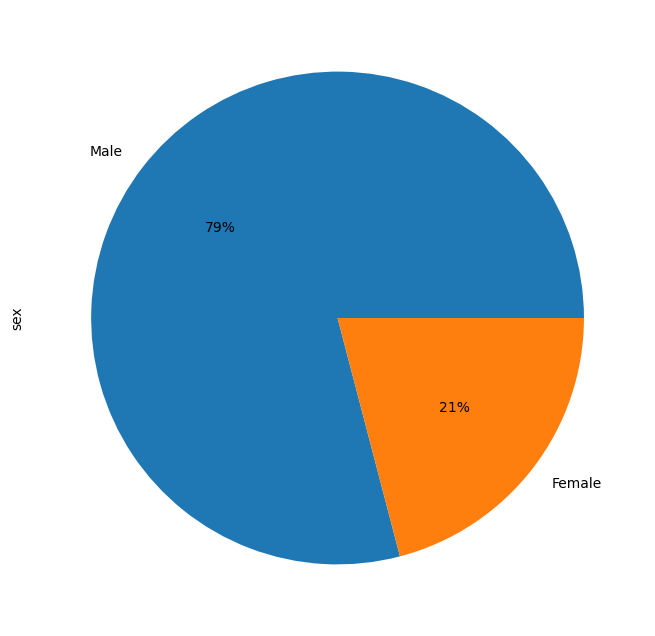

------------------------------------------------------------------
cp


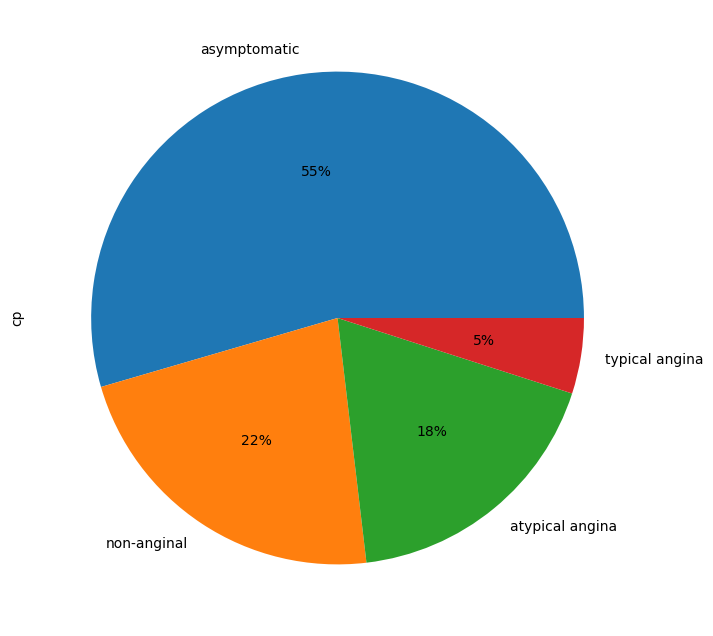

------------------------------------------------------------------
restecg


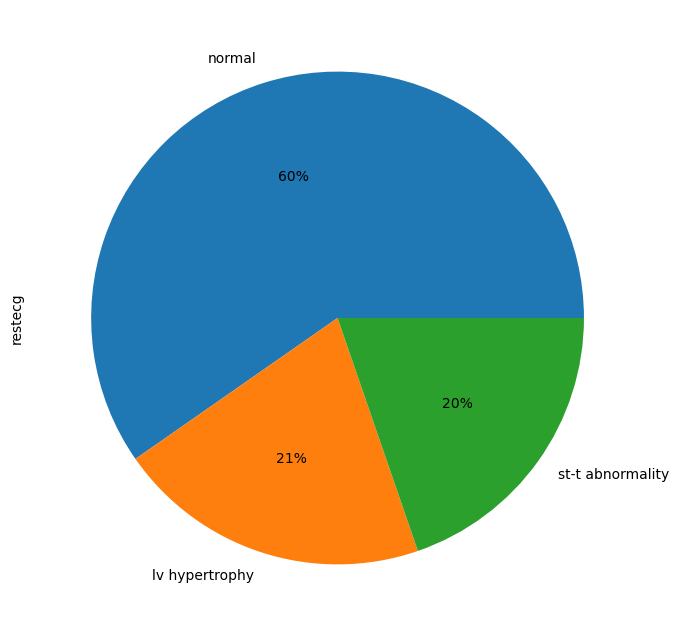

------------------------------------------------------------------
exang


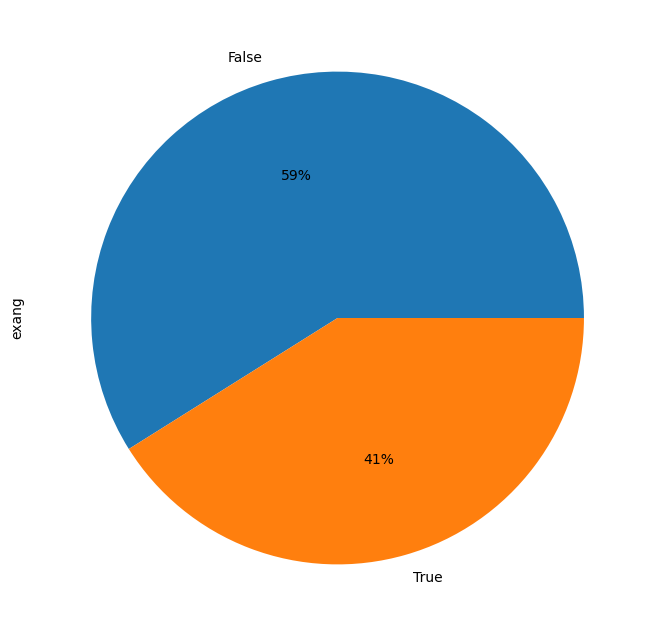

------------------------------------------------------------------
slope


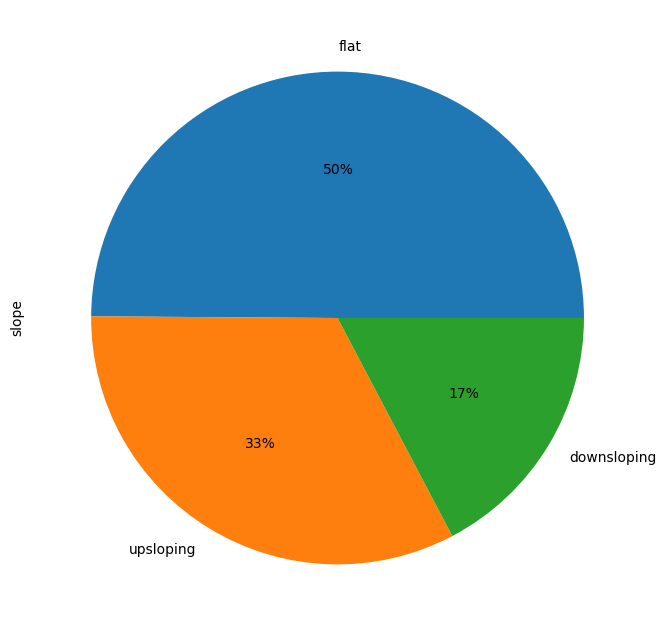

------------------------------------------------------------------
thal


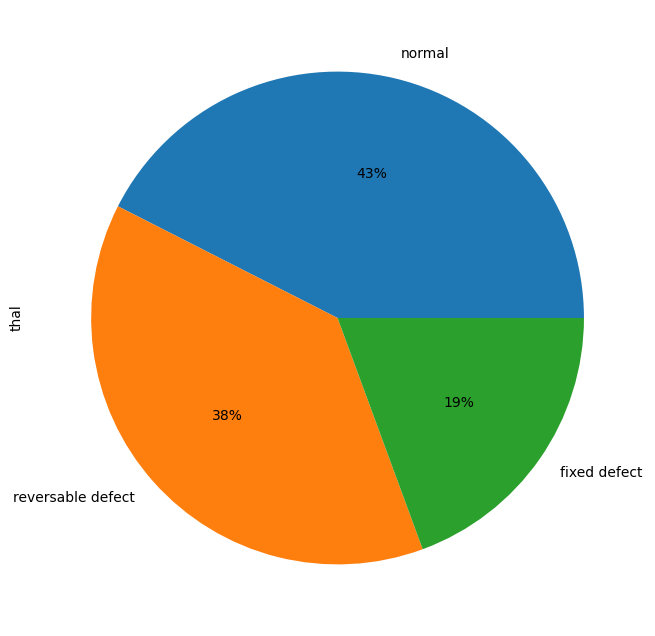

------------------------------------------------------------------


In [79]:
# Pie Charts
for col in cat_columns:
    print(col)
    data[col].value_counts().plot.pie(autopct='%.0f%%')
    plt.show()
    print('------------------------------------------------------------------')
     

In [80]:
#Covert Boolean to Numerical
data['fbs'] = data['fbs'].astype(int)
data['fbs'].unique()
     



array([1, 0])

In [81]:
for col in cat_columns:
    print(col)
    print(data[col].unique())

sex
['Male' 'Female']
cp
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
restecg
['lv hypertrophy' 'normal' 'st-t abnormality']
exang
[False  True]
slope
['downsloping' 'flat' 'upsloping']
thal
['fixed defect' 'normal' 'reversable defect']


<Axes: >

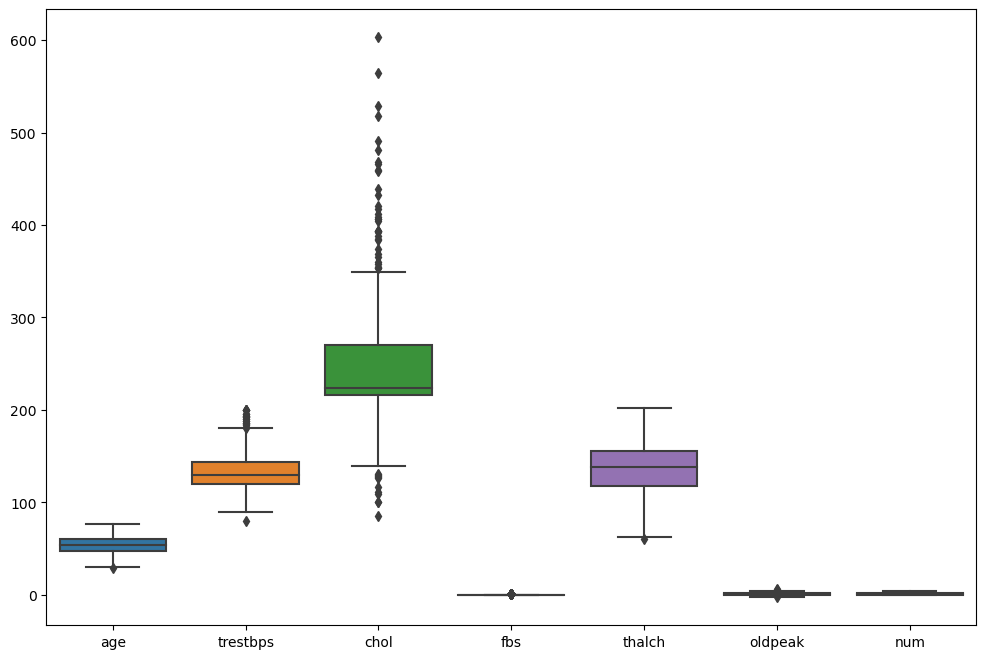

In [82]:
# Outliers
sns.boxplot(data=data[num_columns])

In [83]:
# Outliers are present in the following columns
outliers_columns = ["age","trestbps","chol","thalch","oldpeak"]
# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(data, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    data.loc[data[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    data.loc[data[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]
     

<Axes: >

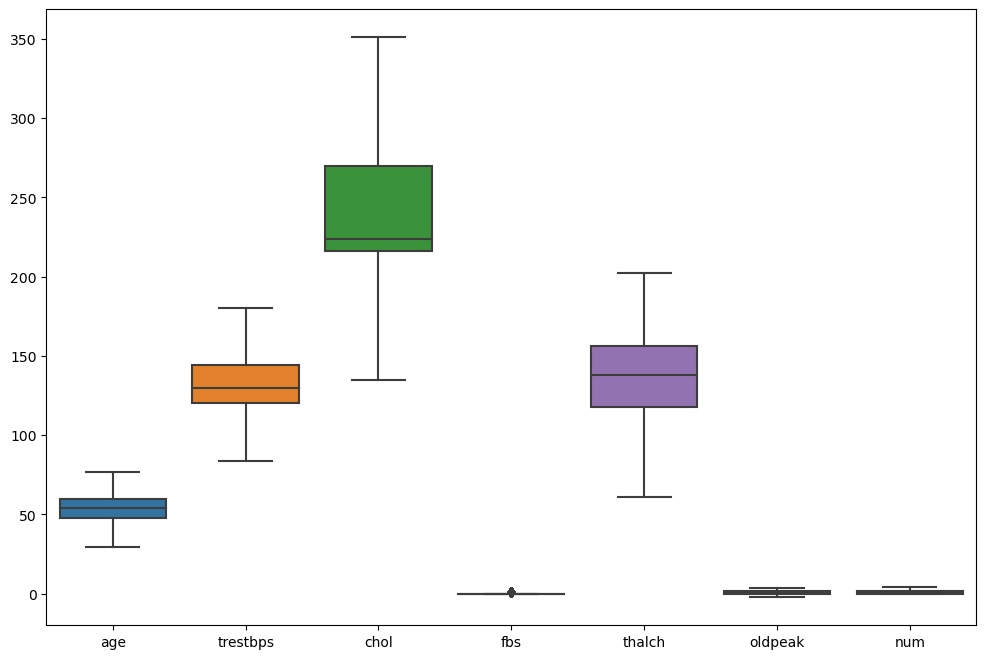

In [84]:


sns.boxplot(data=data[num_columns])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

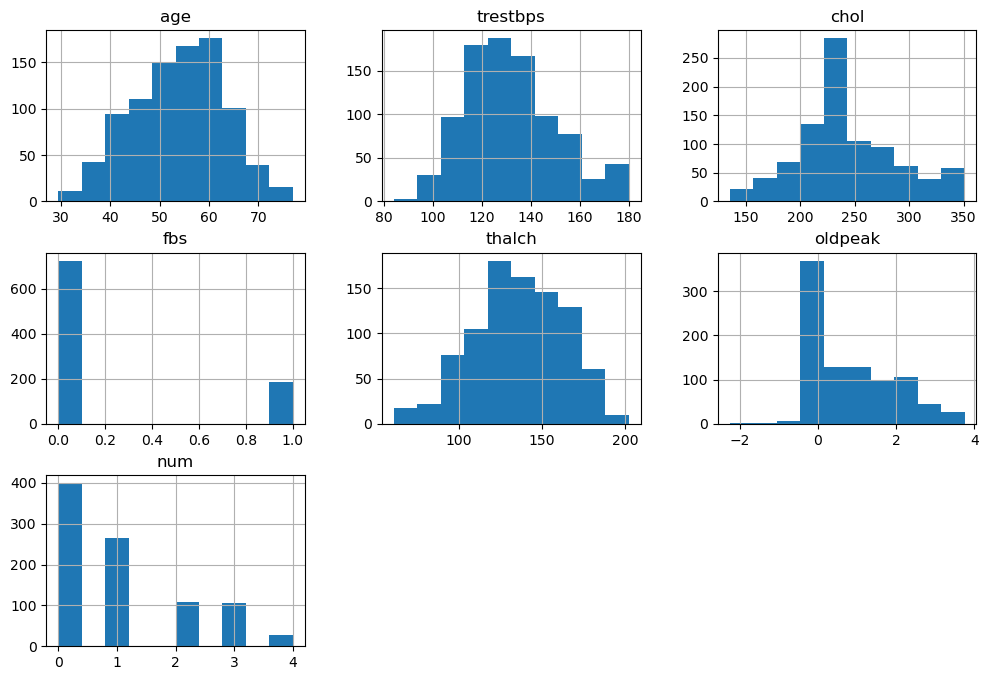

In [85]:
# Histogram
data.hist()

sex


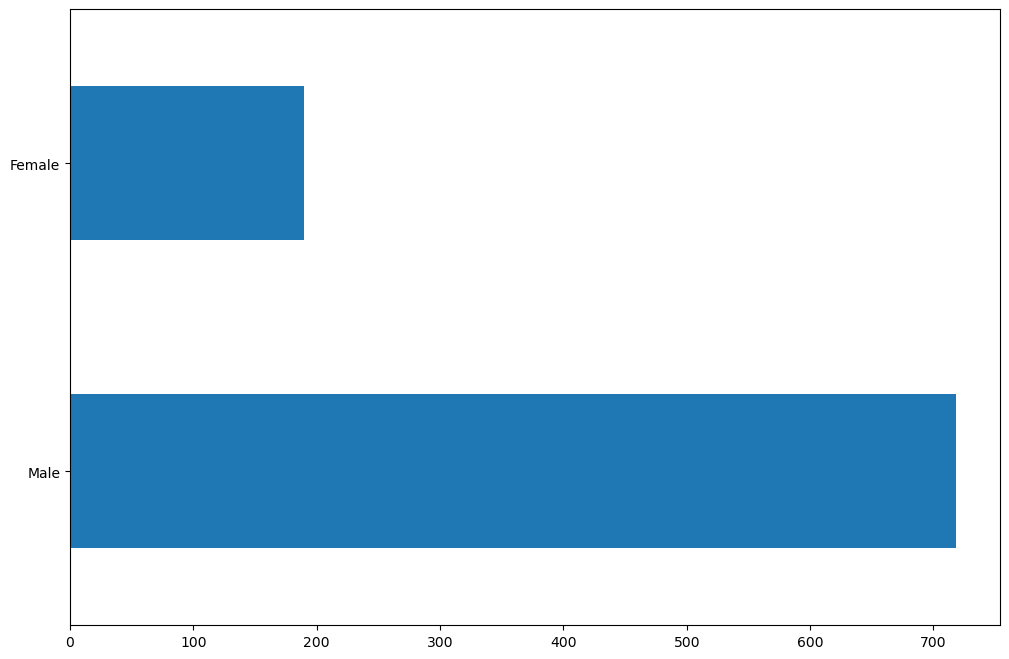

-----------------------------------------------
cp


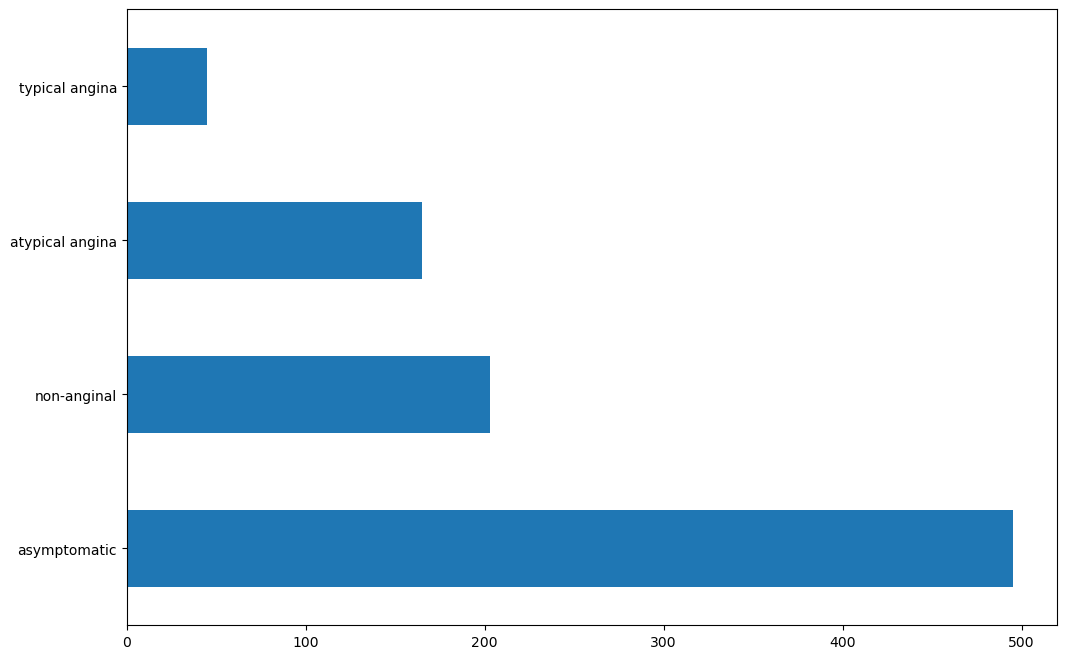

-----------------------------------------------
restecg


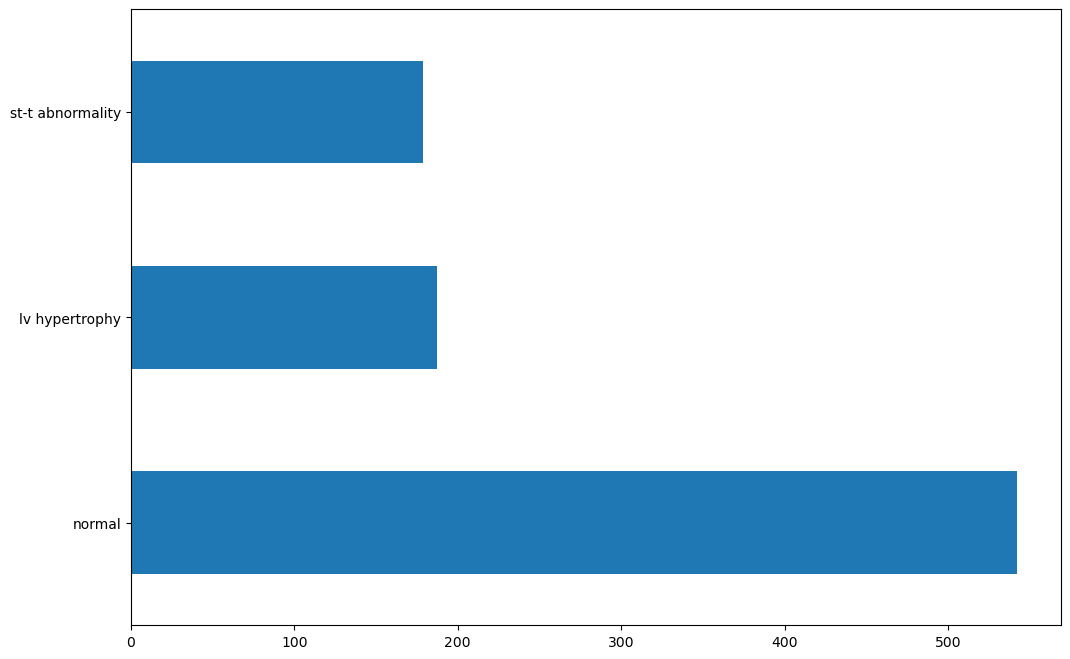

-----------------------------------------------
exang


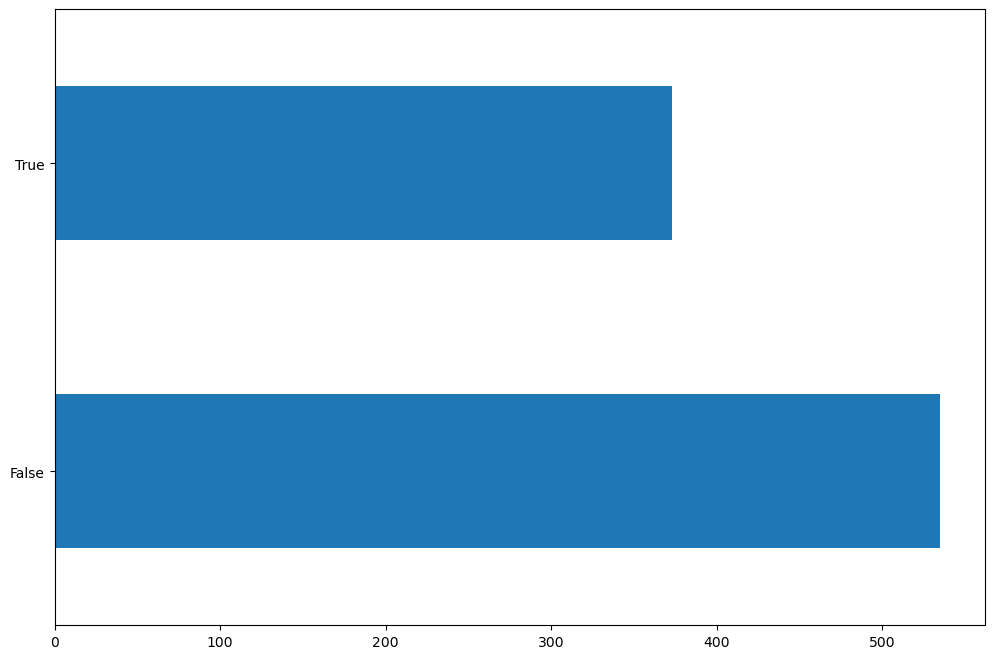

-----------------------------------------------
slope


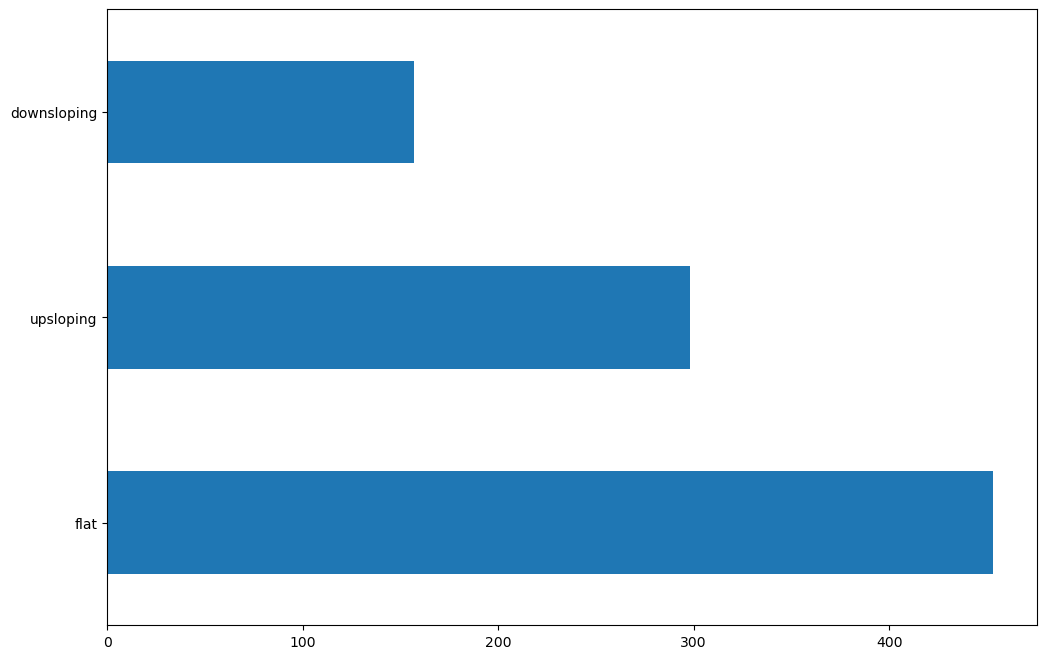

-----------------------------------------------
thal


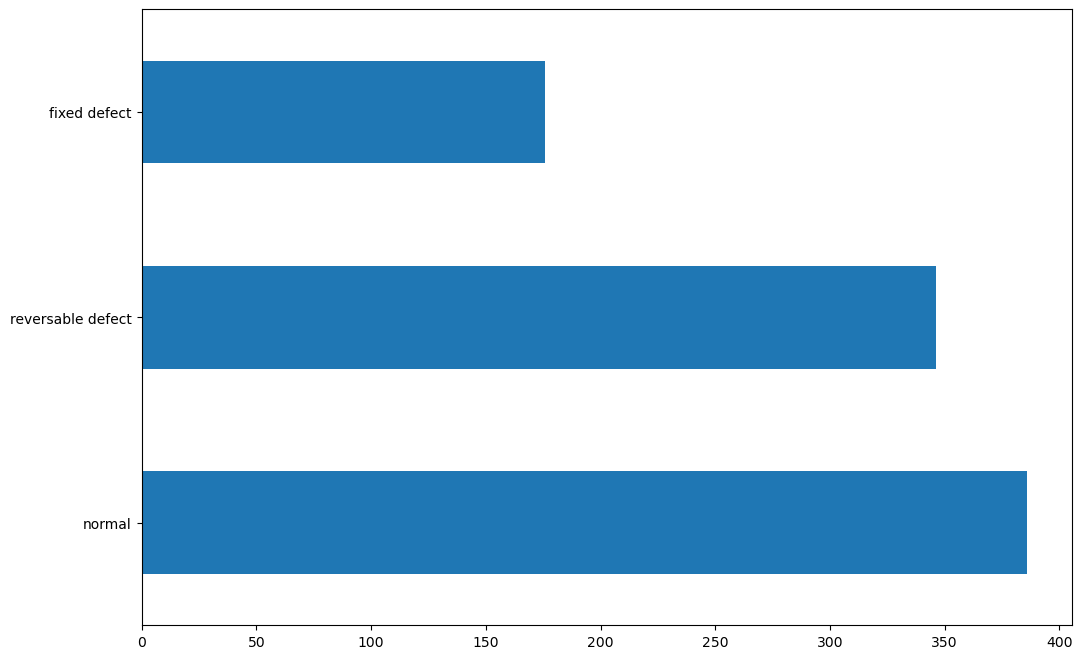

-----------------------------------------------


In [86]:
for col in cat_columns:
    print(col)
    data[col].value_counts().plot.barh()
    plt.show()
    print('-----------------------------------------------')

In [87]:

# Correlation for Numerical columns
data[num_columns].corr(method='pearson')


,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.263358,0.019452,0.176701,-0.328068,0.220790,0.326493
trestbps,0.263358,1.000000,0.129754,0.111568,-0.130378,0.143961,0.147747
chol,0.019452,0.129754,1.000000,0.013243,0.024578,0.028379,-0.007221
fbs,0.176701,0.111568,0.013243,1.000000,-0.065456,0.011890,0.156268
thalch,-0.328068,-0.130378,0.024578,-0.065456,1.000000,-0.115305,-0.323060
oldpeak,0.220790,0.143961,0.028379,0.011890,-0.115305,1.000000,0.406053
num,0.326493,0.147747,-0.007221,0.156268,-0.323060,0.406053,1.000000


<Axes: >

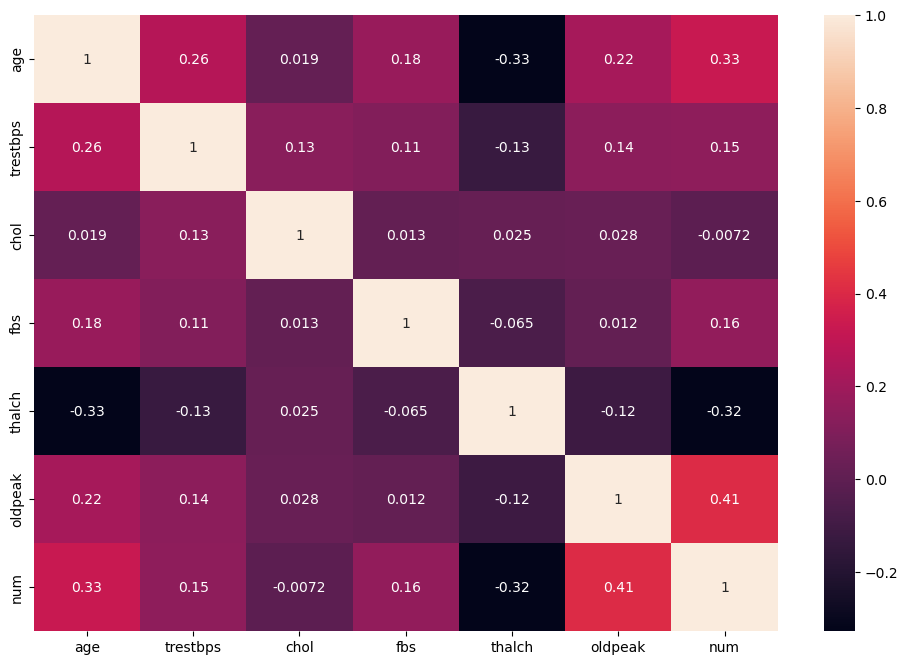

In [88]:
#Heatmap
sns.heatmap(data[num_columns].corr(method='pearson'),annot=True,)


3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [89]:
for col in cat_columns:
    print(col)
    print(data[col].unique())


sex
['Male' 'Female']
cp
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
restecg
['lv hypertrophy' 'normal' 'st-t abnormality']
exang
[False  True]
slope
['downsloping' 'flat' 'upsloping']
thal
['fixed defect' 'normal' 'reversable defect']


In [90]:
ec_data = data.copy()


In [91]:
# Ordinal Encoding
ec_data["sex"] = data["sex"].replace(to_replace={"Male":-1, "Female":1})
ec_data["restecg"] = data["restecg"].replace(to_replace={"lv hypertrophy":1, "normal":2, "st-t abnormality":3})
ec_data["exang"] = data["exang"].replace(to_replace={False:0, True:1})
ec_data["slope"] = data["slope"].replace(to_replace={"downsloping":-1, "flat":0, "upsloping":1})
ec_data["thal"] = data["thal"].replace(to_replace={"reversable defect":-1, "normal":0, "fixed defect":1})
ec_data["cp"] = data["cp"].replace(to_replace={"typical angina":1, "atypical angina":2, "non-anginal":3, "asymptomatic":4})
     

In [92]:
# One Hot Encoding
ec_data = pd.get_dummies(ec_data, columns=["sex","restecg"],drop_first=True)
ec_data.head()


,age,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,thal,num,sex_1,restecg_2,restecg_3
0,63.0,1,145,233,1,150,0,2.3,-1,1,0,0,0,0
1,41.0,2,135,203,0,132,0,0.0,0,1,0,0,1,0
2,57.0,4,140,192,0,148,0,0.4,0,1,0,0,1,0
3,52.0,1,118,186,0,190,0,0.0,0,1,0,0,0,0
4,57.0,4,110,201,0,126,1,1.5,0,1,0,0,1,0


In [93]:

ec_data.describe()


,age,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,thal,num,sex_1,restecg_2,restecg_3
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.792263,3.264317,133.333700,241.439427,0.203744,135.958150,0.410793,0.854846,0.155286,-0.187225,1.008811,0.209251,0.596916,0.197137
std,9.156920,0.925305,19.231196,46.628983,0.403003,26.801825,0.492249,1.024737,0.691023,0.735141,1.144436,0.406998,0.490788,0.398056
min,29.375000,1.000000,84.000000,135.000000,0.000000,61.000000,0.000000,-2.250000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,3.000000,120.000000,216.000000,0.000000,118.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,4.000000,130.000000,224.000000,0.000000,138.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,4.000000,144.000000,270.000000,0.000000,156.000000,1.000000,1.500000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,77.000000,4.000000,180.000000,351.000000,1.000000,202.000000,1.000000,3.750000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [94]:
# Train Test Split
X = ec_data.drop('num',axis=1)
y = ec_data['num']
     



In [95]:


xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=1)
     




In [96]:
dt = DecisionTreeClassifier(criterion='gini') # C5.0 uses entropy as criterion
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred


array([0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 0, 3, 2, 3, 3, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 3, 0, 1, 0, 1, 1, 0, 4, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 2, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 3, 2, 0, 1, 3, 0, 1, 2, 1, 0,
       2, 3, 0, 1, 0, 1, 1, 0, 4, 1, 0, 0, 0, 1, 0, 0, 1, 0, 3, 3, 3, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 3, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 3, 0, 2, 1, 0, 3, 0, 1, 2, 2, 2, 0, 0, 1, 3, 3, 1, 4, 1, 0, 2,
       0, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0,
       0, 3, 0, 1, 3, 1])

In [97]:
dt.feature_importances_ # Information gain for respective columns, it can be also used in Feature Selection
     

array([0.16204144, 0.15814911, 0.12686805, 0.11451649, 0.03063198,
       0.1453023 , 0.02507192, 0.09423851, 0.04483391, 0.04133338,
       0.01743712, 0.03008278, 0.00949302])

In [98]:
col_names = ec_data.columns.tolist()
col_names


['age',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num',
 'sex_1',
 'restecg_2',
 'restecg_3']

[Text(0.48628216911764705, 0.9705882352941176, 'cp <= 3.5\ngini = 0.693\nsamples = 726\nvalue = [318.0, 213.0, 90.0, 82.0, 23.0]\nclass = 0'),
 Text(0.18318014705882352, 0.9117647058823529, 'age <= 56.5\ngini = 0.446\nsamples = 329\nvalue = [238.0, 52.0, 17.0, 18.0, 4.0]\nclass = 0'),
 Text(0.3347311580882353, 0.9411764705882353, 'True  '),
 Text(0.11887254901960784, 0.8529411764705882, 'oldpeak <= 2.45\ngini = 0.284\nsamples = 223\nvalue = [187, 24, 5, 5, 2]\nclass = 0'),
 Text(0.08088235294117647, 0.7941176470588235, 'thalch <= 133.5\ngini = 0.249\nsamples = 216\nvalue = [186, 20, 4, 5, 1]\nclass = 0'),
 Text(0.03823529411764706, 0.7352941176470589, 'exang <= 0.5\ngini = 0.51\nsamples = 51\nvalue = [34, 10, 3, 3, 1]\nclass = 0'),
 Text(0.01764705882352941, 0.6764705882352942, 'cp <= 1.5\ngini = 0.387\nsamples = 39\nvalue = [30, 5, 2, 2, 0]\nclass = 0'),
 Text(0.013725490196078431, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]\nclass = 1'),
 Text(0.021568627450

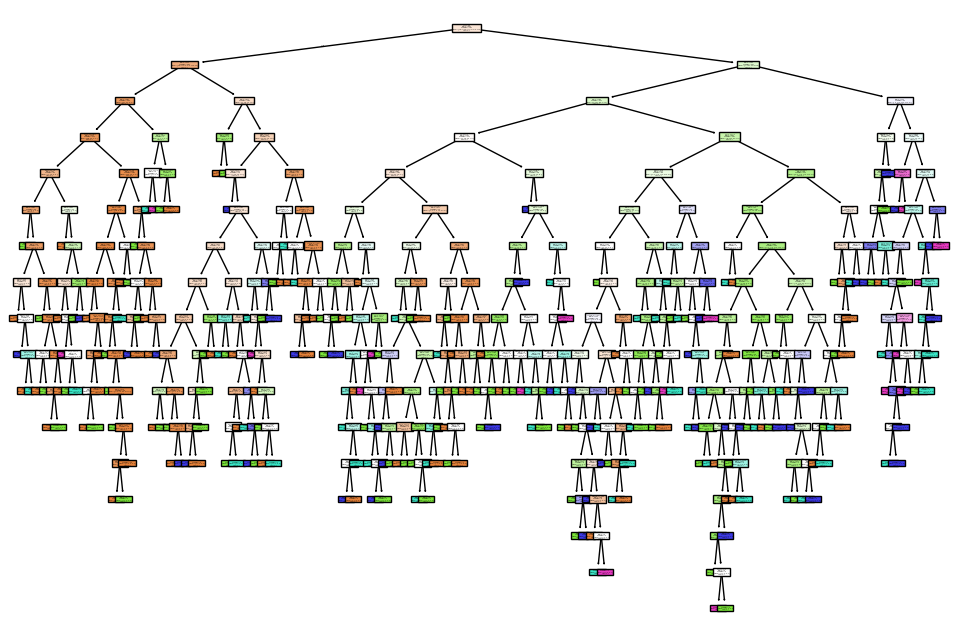

In [99]:
tree.plot_tree(dt, feature_names= col_names,
              class_names=['0','1','2','3','4'],
              filled=True)


# Model Evaluation

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
     

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63        81
           1       0.32      0.31      0.31        52
           2       0.16      0.16      0.16        19
           3       0.20      0.20      0.20        25
           4       0.33      0.20      0.25         5

    accuracy                           0.42       182
   macro avg       0.32      0.30      0.31       182
weighted avg       0.42      0.42      0.42       182



In [101]:
confusion_matrix(ytest,ypred)


array([[52, 16,  4,  9,  0],
       [20, 16,  7,  7,  2],
       [ 6,  6,  3,  4,  0],
       [ 5, 10,  5,  5,  0],
       [ 2,  2,  0,  0,  1]])

In [102]:


print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.4230769230769231


In [103]:
import matplotlib.pyplot as plt
tree_info = dt.tree_
num_nodes = tree_info.node_count
num_leaves = tree_info.n_leaves
num_decision = num_nodes - num_leaves

print("Number of nodes:", num_nodes)
print("Number of leaves:", num_leaves)
print("Number of decision:", num_decision)


Number of nodes: 509
Number of leaves: 255
Number of decision: 254


[Text(0.48628216911764705, 0.9705882352941176, 'cp <= 3.5\ngini = 0.693\nsamples = 726\nvalue = [318.0, 213.0, 90.0, 82.0, 23.0]\nclass = 0'),
 Text(0.18318014705882352, 0.9117647058823529, 'age <= 56.5\ngini = 0.446\nsamples = 329\nvalue = [238.0, 52.0, 17.0, 18.0, 4.0]\nclass = 0'),
 Text(0.3347311580882353, 0.9411764705882353, 'True  '),
 Text(0.11887254901960784, 0.8529411764705882, 'oldpeak <= 2.45\ngini = 0.284\nsamples = 223\nvalue = [187, 24, 5, 5, 2]\nclass = 0'),
 Text(0.08088235294117647, 0.7941176470588235, 'thalch <= 133.5\ngini = 0.249\nsamples = 216\nvalue = [186, 20, 4, 5, 1]\nclass = 0'),
 Text(0.03823529411764706, 0.7352941176470589, 'exang <= 0.5\ngini = 0.51\nsamples = 51\nvalue = [34, 10, 3, 3, 1]\nclass = 0'),
 Text(0.01764705882352941, 0.6764705882352942, 'cp <= 1.5\ngini = 0.387\nsamples = 39\nvalue = [30, 5, 2, 2, 0]\nclass = 0'),
 Text(0.013725490196078431, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]\nclass = 1'),
 Text(0.021568627450

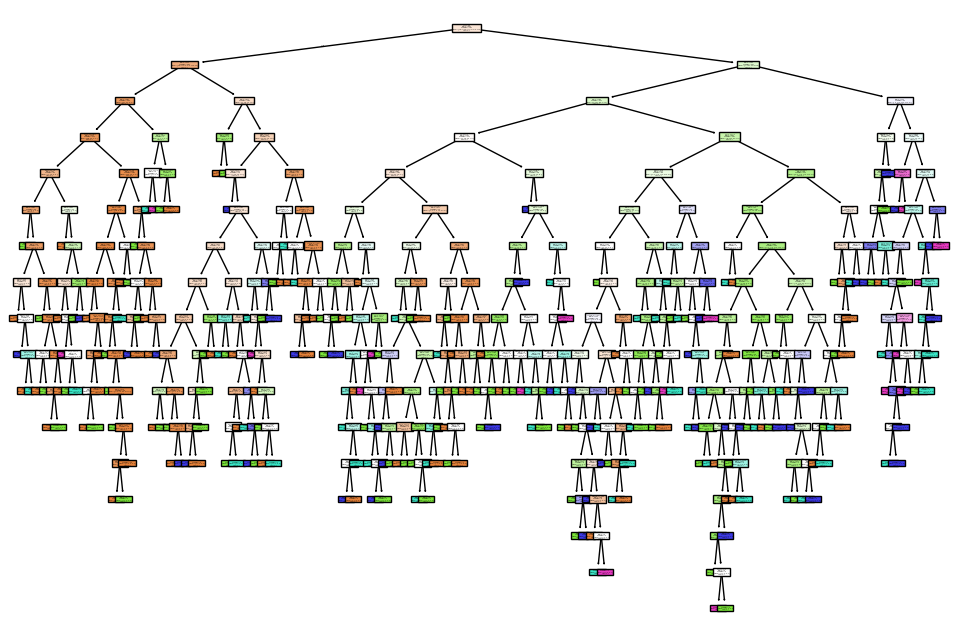

In [104]:
tree.plot_tree(dt, feature_names= col_names,
              class_names=['0','1','2','3','4'],
              filled=True)

# 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [105]:
from sklearn.model_selection import RandomizedSearchCV
     

params= {'max_features': ('auto', 'sqrt', 'log2'),
              'max_depth' : (3,5, 6, 7, 8, 9),
              'criterion' :('gini', 'entropy'),
              'min_samples_split':(2,4,6)
             }
     

DT_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params,cv=5,
                   verbose=True)
     

DT_grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 6, 7, 8, 9),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [106]:

DT_grid_best = DT_grid.best_estimator_
DT_grid_best

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=6)

In [107]:

DT_model = DecisionTreeClassifier(criterion='entropy',
                           max_depth=6, ccp_alpha=0.01, max_features='sqrt', min_samples_split=4)
     

DT_model.fit(xtrain,ytrain)
ypred  = DT_model.predict(xtest)
     

DT_model.score(xtrain, ytrain), DT_model.score(xtest, ytest)


(0.5991735537190083, 0.45604395604395603)

[Text(0.475, 0.9285714285714286, 'oldpeak <= 0.45\nentropy = 1.927\nsamples = 726\nvalue = [318.0, 213.0, 90.0, 82.0, 23.0]\nclass = 0'),
 Text(0.2, 0.7857142857142857, 'cp <= 3.5\nentropy = 1.47\nsamples = 329\nvalue = [209.0, 75.0, 23.0, 19.0, 3.0]\nclass = 0'),
 Text(0.3375, 0.8571428571428572, 'True  '),
 Text(0.12, 0.6428571428571429, 'age <= 55.5\nentropy = 0.925\nsamples = 201\nvalue = [164, 24, 6, 7, 0]\nclass = 0'),
 Text(0.08, 0.5, 'chol <= 219.5\nentropy = 0.444\nsamples = 146\nvalue = [134, 11, 0, 1, 0]\nclass = 0'),
 Text(0.04, 0.35714285714285715, 'entropy = 0.0\nsamples = 54\nvalue = [54, 0, 0, 0, 0]\nclass = 0'),
 Text(0.12, 0.35714285714285715, 'entropy = 0.613\nsamples = 92\nvalue = [80, 11, 0, 1, 0]\nclass = 0'),
 Text(0.16, 0.5, 'entropy = 1.666\nsamples = 55\nvalue = [30.0, 13.0, 6.0, 6.0, 0.0]\nclass = 0'),
 Text(0.28, 0.6428571428571429, 'oldpeak <= 0.25\nentropy = 1.893\nsamples = 128\nvalue = [45, 51, 17, 12, 3]\nclass = 1'),
 Text(0.24, 0.5, 'fbs <= 0.5\nentro

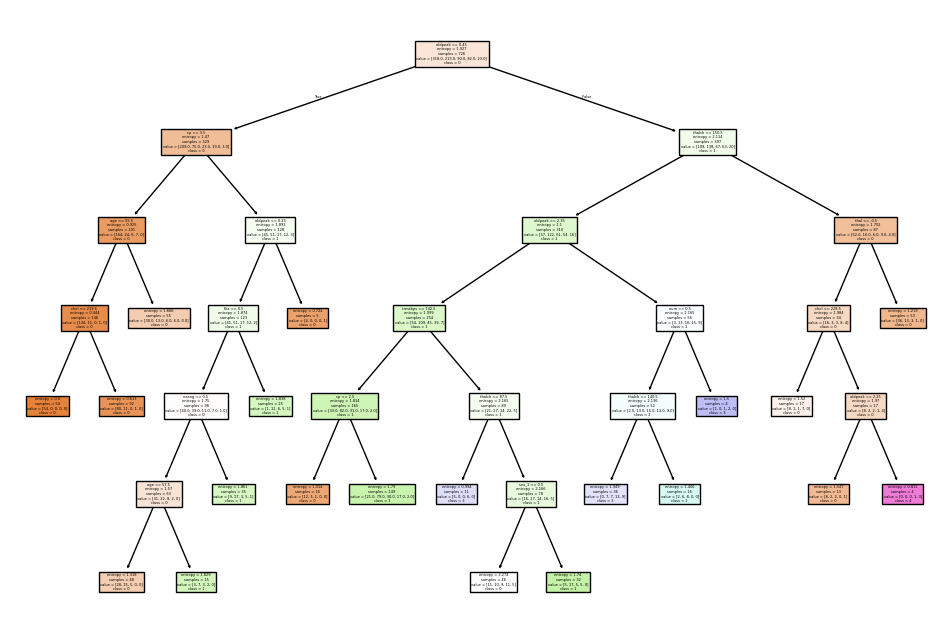

In [108]:
tree.plot_tree(DT_model, feature_names= col_names,
              class_names=['0','1','2','3','4'],
              filled=True)

In [109]:
from sklearn.model_selection import GridSearchCV
     

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)
     

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 6, 7, 8, 9),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': (2, 4, 6)},
             verbose=1)

In [110]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 6}

In [111]:
dtr = DecisionTreeClassifier(criterion='entropy',
                           max_depth=3, ccp_alpha=0.01, max_features='log2', min_samples_split=2)
     

dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

# 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained. Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [112]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)


(0.5702479338842975, 0.5494505494505495)

[Text(0.5, 0.875, 'exang <= 0.5\nentropy = 1.927\nsamples = 726\nvalue = [318.0, 213.0, 90.0, 82.0, 23.0]\nclass = 0'),
 Text(0.25, 0.625, 'thal <= -0.5\nentropy = 1.593\nsamples = 422\nvalue = [261, 86, 36, 29, 10]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'cp <= 3.5\nentropy = 1.925\nsamples = 140\nvalue = [70.0, 29.0, 17.0, 17.0, 7.0]\nclass = 0'),
 Text(0.0625, 0.125, 'entropy = 1.223\nsamples = 84\nvalue = [63, 11, 4, 5, 1]\nclass = 0'),
 Text(0.1875, 0.125, 'entropy = 2.212\nsamples = 56\nvalue = [7, 18, 13, 12, 6]\nclass = 1'),
 Text(0.375, 0.375, 'thalch <= 130.5\nentropy = 1.373\nsamples = 282\nvalue = [191.0, 57.0, 19.0, 12.0, 3.0]\nclass = 0'),
 Text(0.3125, 0.125, 'entropy = 1.95\nsamples = 83\nvalue = [34.0, 25.0, 12.0, 10.0, 2.0]\nclass = 0'),
 Text(0.4375, 0.125, 'entropy = 0.969\nsamples = 199\nvalue = [157, 32, 7, 2, 1]\nclass = 0'),
 Text(0.75, 0.625, 'chol <= 183.0\nentropy = 2.056\nsamples = 304\nvalue = [57.0, 127.0, 54.0, 53.0, 13.0]\nclass =

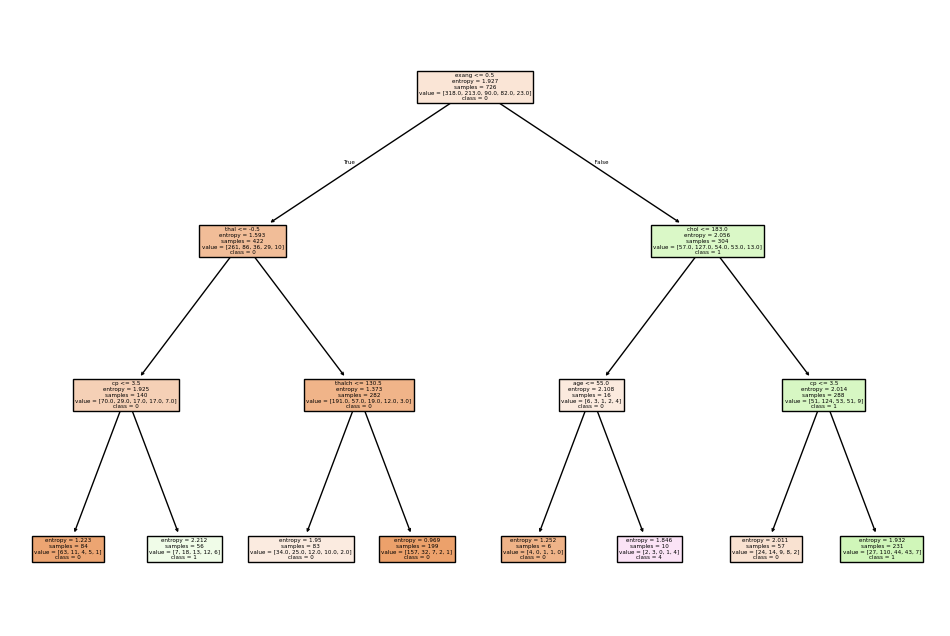

In [113]:
tree.plot_tree(dtr, feature_names= col_names,
              class_names=['0','1','2','3','4'],
              filled=True)
